In [25]:
import numpy as np
from PlotFunctions import *

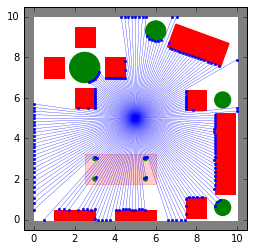

In [121]:
# parameters for line extraction (feel free to adjust these)
MIN_SEG_LENGTH = 0.05; # minimum length of each line segment (m)
LINE_POINT_DIST_THRESHOLD = 0.02; # max distance of pt from line to split
MIN_POINTS_PER_SEGMENT = 6; # minimum number of points per line segment

# Data files are formated as 'rangeData_<x_r>_<y_r>_N_pts.csv
# where x_r is the robot's x position
#       y_r is the robot's y position
#       N_pts is the number of beams (e.g. 180 -> beams are 2deg apart)

filename = 'rangeData_5_5_180.csv'
#filename = 'rangeData_4_9_360.csv'
#filename = 'rangeData_7_2_90.csv'

#Import Range Data
RangeData = ImportRangeData(filename)

params = {'MIN_SEG_LENGTH': MIN_SEG_LENGTH,
          'LINE_POINT_DIST_THRESHOLD': LINE_POINT_DIST_THRESHOLD,
          'MIN_POINTS_PER_SEGMENT': MIN_POINTS_PER_SEGMENT}

#alpha, r, segend, pointIdx = ExtractLines(RangeData, params)

ax = PlotScene()
ax = PlotData(RangeData, ax)
ax = PlotRays(RangeData, ax)
#ax = PlotLines(segend, ax)

plt.show(ax)

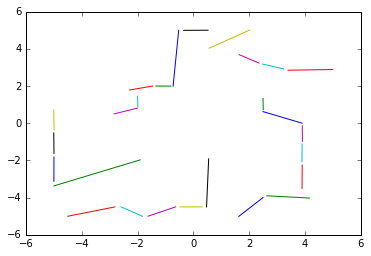

In [169]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(len(idx)):
    #print idx[i][0], idx[i][1]
    x1 = rho[idx[i][0]]*np.cos(theta[idx[i][0]])
    y1 = rho[idx[i][0]]*np.sin(theta[idx[i][0]])
    x2 = rho[idx[i][1]]*np.cos(theta[idx[i][1]])
    y2 = rho[idx[i][1]]*np.sin(theta[idx[i][1]])
    plt.plot([x1,x2],[y1,y2])
    
plt.show()
    

In [122]:
x_r = RangeData[0]
y_r = RangeData[1]
theta = RangeData[2]
rho = RangeData[3]
x = x_r + rho*np.cos(theta)
y = y_r + rho*np.sin(theta)

startIdx = 0;
endIdx = theta.shape[0] - 1

startIdx, endIdx

(0, 179)

In [126]:
# alpha, r, idx = SplitLinesRecursive(theta, rho, startIdx, endIdx, params)

L = [] # empty list
S = (0, len(theta-1)) # set with all points
L.append(S)
L
i=0
alpha = {}
r = {}

j = 0

while i+1 <= len(L) and j < 100:
    j += 1
    #print "j:", j
    #print "i:", i
    # fit a line to points in L[i]
    alpha[i], r[i] = FitLine(theta[L[i][0]:L[i][1]], rho[L[i][0]:L[i][1]])
    # find where to split the line
    spltIdx = FindSplit(theta[L[i][0]:L[i][1]], rho[L[i][0]:L[i][1]], alpha, r, params)
    #print "spltIdx:", spltIdx
    if spltIdx == -1: # not splittable
        #print "i:", i
        #print "indices", L[i]
        i += 1
    else:
        spltIdx += L[i][0]
        # split line into two sets
        S1 = (L[i][0], spltIdx-1)
        S2 = (spltIdx, L[i][-1]) #includes the spltIdx
        # Assign to L
        L[i] = S1
        L.insert(i+1, S2)
        


In [143]:
alphaArray = np.array([val for _,val in alpha.iteritems()])
rArray = np.array([val for _,val in r.iteritems()])
LArray = np.array([[val[0],val[1]] for val in L])
alphaArray.shape, rArray.shape, LArray.shape

((26,), (26,), (26, 2))

In [167]:
#-----------------------------------------------------------
# SplitLineRecursive
#
# This function executes a recursive line-slitting algorithm,
# which recursively sub-divides line segments until no further
# splitting is required.
#
# INPUT:  theta - (1D) np array of angle 'theta' from data (rads)
#           rho - (1D) np array of distance 'rho' from data (m)
#      startIdx - starting index of segment to be split
#        endIdx - ending index of segment to be split
#        params - dictionary of parameters
#
# OUTPUT: alpha - (1D) np array of 'alpha' for each fitted line (rads)
#             r - (1D) np array of 'r' for each fitted line (m)
#           idx - (N_lines,2) segment's first and last point index

def SplitLinesRecursive(theta, rho, startIdx, endIdx, params):

    L = [] # empty list
    S = (0, len(theta)-1) # set with all points
    L.append(S)
    L
    i=0
    alpha_dict = {}
    r_dict = {}
    
    while i+1 <= len(L):
        #print "j:", j
        #print "i:", i
        # fit a line to points in L[i]
        alpha_dict[i], r_dict[i] = FitLine(theta[L[i][0]:L[i][1]], rho[L[i][0]:L[i][1]])
        # find where to split the line
        spltIdx = FindSplit(theta[L[i][0]:L[i][1]], rho[L[i][0]:L[i][1]], alpha_dict[i], r_dict[i], params)
        #print "spltIdx:", spltIdx
        if spltIdx == -1: # not splittable
            #print "i:", i
            #print "indices", L[i]
            i += 1
        else:
            spltIdx += L[i][0]
            # split line into two sets
            S1 = (L[i][0], spltIdx-1)
            S2 = (spltIdx, L[i][-1]) #includes the spltIdx
            # Assign to L
            L[i] = S1
            L.insert(i+1, S2)
        
    alpha = np.array([val for _,val in alpha_dict.iteritems()])
    r = np.array([val for _,val in r_dict.iteritems()])
    idx = np.array([[val[0],val[1]] for val in L])

    return alpha, r, idx


In [168]:
alpha, r, idx = SplitLinesRecursive(theta, rho, 0, theta.shape[0], params)

In [153]:
idx

array([[  0,   7],
       [  8,  14],
       [ 15,  20],
       [ 21,  26],
       [ 27,  33],
       [ 34,  41],
       [ 42,  47],
       [ 48,  55],
       [ 56,  62],
       [ 63,  71],
       [ 72,  78],
       [ 79,  85],
       [ 86,  92],
       [ 93,  99],
       [100, 106],
       [107, 113],
       [114, 119],
       [120, 125],
       [126, 131],
       [132, 137],
       [138, 143],
       [144, 152],
       [153, 159],
       [160, 166],
       [167, 173],
       [174, 180]])

In [93]:
## FitLine() ##
## Calculate alpha and r
n = theta.shape[0]
num1 = np.sum(rho*rho*np.sin(2*theta))
num2 = (-2.0/n)*np.sum(np.sum(np.array([rho*np.sin(theta)]).T.dot(np.array([rho*np.cos(theta)]))))
den1 = np.sum(rho*rho*np.cos(2*theta))
den2 = (-1.0/n)*np.sum(np.sum(
    np.array([rho]).T.dot(np.array([rho]))*np.cos(
        np.repeat(np.array([theta]).T,n,1) + np.repeat(np.array([theta]).T,n,1).T)))

alpha = 0.5*np.arctan2((num1+num2), (den1+den2))

r = (1.0/n)*np.sum(rho*np.cos(theta-alpha))
alpha, r


(0.80624569223179909, -0.2824529245986131)

In [88]:
num1

456.42452312417657

In [89]:
num2

2.982787582161043

In [90]:
den1

-49.45784258229159

In [91]:
den2

30.291720355294629

In [125]:

#-----------------------------------------------------------
# FindSplit
#
# This function takes in a line segment and outputs the best
# index at which to split the segment
#
# INPUT:  theta - (1D) np array of angle 'theta' from data (rads)
#           rho - (1D) np array of distance 'rho' from data (m)
#         alpha - 'alpha' of input line segment (1 number)
#             r - 'r' of input line segment (1 number)
#        params - dictionary of parameters
#
# OUTPUT: SplitIdx - idx at which to split line (return -1 if
#                    it cannot be split)

def FindSplit(theta, rho, alpha, r, params):

    ##### TO DO #####
    # Implement a function to find the split index (if one exists)
    # It should compute the distance of each point to the line.
    # The index to split at is the one with the maximum distance
    # value that exceeds 'LINE_POINT_DIST_THRESHOLD', and also does
    # not divide into segments smaller than 'MIN_POINTS_PER_SEGMENT'
    # return -1 if no split is possiple
    #################

    alpha, r = FitLine(theta, rho)

    # calculate squared distances d from points to line
    d = (rho*np.cos(theta - alpha) - r)**2
    # find farthest point from line
    splitIdx = np.argmax(d)
    maxval = d[splitIdx]
    indices = np.ones(theta.shape)

    # test for length (in meters) of resulting line segments
    x1 = rho[0]*np.cos(theta[0])
    x2 = rho[splitIdx]*np.cos(theta[splitIdx])
    x3 = rho[-1]*np.cos(theta[-1])
    y1 = rho[0]*np.sin(theta[0])
    y2 = rho[splitIdx]*np.sin(theta[splitIdx])
    y3 = rho[-1]*np.sin(theta[-1])
    
    l1 = np.sqrt((x[1] - x[2])**2 + (y[1] - y[2])**2)
    l2 = np.sqrt((x[3] - x[2])**2 + (y[3] - y[2])**2)
    
    #if l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']:
        
    
    # check against threshold
    if maxval < params['LINE_POINT_DIST_THRESHOLD']**2:
        #print "d does not exceed threshold. Cannot split"
        return -1
    

    # check against min number of points
    while min(len(theta[:splitIdx]), len(theta[splitIdx:])) < params['MIN_POINTS_PER_SEGMENT'] or (
        l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']):
        #if l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']:
            #print "Produces a segment that is too short"
        #if min(len(theta[:splitIdx]), len(theta[splitIdx:])) < params['MIN_POINTS_PER_SEGMENT']:
            #print "Produces a segment that includes too few points"
            
        indices[splitIdx] = 0

        if sum(indices) == 0:
            #print "no eligible splitting point found"
            return -1
            #break
            
        # test for length (in meters) of resulting line segments
        x1 = rho[0]*np.cos(theta[0])
        x2 = rho[splitIdx]*np.cos(theta[splitIdx])
        x3 = rho[-1]*np.cos(theta[-1])
        y1 = rho[0]*np.sin(theta[0])
        y2 = rho[splitIdx]*np.sin(theta[splitIdx])
        y3 = rho[-1]*np.sin(theta[-1])

        l1 = np.sqrt((x[1] - x[2])**2 + (y[1] - y[2])**2)
        l2 = np.sqrt((x[3] - x[2])**2 + (y[3] - y[2])**2)

        splitIdx = np.argmax(d*indices)
        #print splitIdx
        maxval = d[splitIdx]
        
        if maxval < params['LINE_POINT_DIST_THRESHOLD']**2:
            #print "d does not exceed threshold. Cannot split"
            return -1
            #break
            
    return splitIdx


In [96]:
#-----------------------------------------------------------
# FitLine
#
# This function outputs a best fit line to a segment of range
# data, expressed in polar form (alpha, r)
#
# INPUT:  theta - (1D) np array of angle 'theta' from data (rads)
#           rho - (1D) np array of distance 'rho' from data (m)
#
# OUTPUT: alpha - 'alpha' of best fit for range data (1 number) (rads)
#             r - 'r' of best fit for range data (1 number) (m)

def FitLine(theta, rho):

    ##### TO DO #####
    # Implement a function to fit a line to polar data points
    # based on the solution to the least squares problem (see Hw)
    #################
    
    n = theta.shape[0]
    num1 = np.sum(rho*rho*np.sin(2*theta))
    num2 = (-2.0/n)*np.sum(np.sum(np.array([rho*np.sin(theta)]).T.dot(np.array([rho*np.cos(theta)]))))
    den1 = np.sum(rho*rho*np.cos(2*theta))
    den2 = (-1.0/n)*np.sum(np.sum(
        np.array([rho]).T.dot(np.array([rho]))*np.cos(
        np.repeat(np.array([theta]).T,n,1) + np.repeat(np.array([theta]).T,n,1).T)))

    alpha = 0.5*np.arctan2((num1+num2), (den1+den2))

    r = (1.0/n)*np.sum(rho*np.cos(theta-alpha))
    alpha, r
    
    # enforce r > 0 
    if r < 0:
        r = abs(r)
        alpha += np.pi
        if alpha > np.pi:
            alpha -= 2*np.pi
    
    return alpha, r

In [107]:
#params = {'MIN_SEG_LENGTH': .05,
#          'LINE_POINT_DIST_THRESHOLD': 0.0,
#          'MIN_POINTS_PER_SEGMENT': 4}

alpha, r = FitLine(theta, rho)

# calculate squared distances d from points to line
d = (rho*np.cos(theta - alpha) - r)**2
# find farthest point from line
splitIdx = np.argmax(d)
maxval = d[splitIdx]
indices = np.ones(theta.shape)

# test for length (in meters) of resulting line segments
x1 = rho[0]*np.cos(theta[0])
x2 = rho[splitIdx]*np.cos(theta[splitIdx])
x3 = rho[-1]*np.cos(theta[-1])
y1 = rho[0]*np.sin(theta[0])
y2 = rho[splitIdx]*np.sin(theta[splitIdx])
y3 = rho[-1]*np.sin(theta[-1])

l1 = np.sqrt((x[1] - x[2])**2 + (y[1] - y[2])**2)
l2 = np.sqrt((x[3] - x[2])**2 + (y[3] - y[2])**2)

#if l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']:


# check against threshold
if maxval < params['LINE_POINT_DIST_THRESHOLD']**2:
    print "d does not exceed threshold. Cannot split"
    #return -1

j = 1

# check against min number of points
while min(len(theta[:splitIdx]), len(theta[splitIdx:])) < params['MIN_POINTS_PER_SEGMENT'] or (
    l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']):
    if l1 < params['MIN_SEG_LENGTH'] or l2 < params['MIN_SEG_LENGTH']:
        print "Produces a segment that is too short"
    if min(len(theta[:splitIdx]), len(theta[splitIdx:])) < params['MIN_POINTS_PER_SEGMENT']:
        print "Produces a segment that includes too few points"

    indices[splitIdx] = 0

    if sum(indices) == 0:
        print "no eligible splitting point found"
        #return -1
        break

    # test for length (in meters) of resulting line segments
    x1 = rho[0]*np.cos(theta[0])
    x2 = rho[splitIdx]*np.cos(theta[splitIdx])
    x3 = rho[-1]*np.cos(theta[-1])
    y1 = rho[0]*np.sin(theta[0])
    y2 = rho[splitIdx]*np.sin(theta[splitIdx])
    y3 = rho[-1]*np.sin(theta[-1])

    l1 = np.sqrt((x[1] - x[2])**2 + (y[1] - y[2])**2)
    l2 = np.sqrt((x[3] - x[2])**2 + (y[3] - y[2])**2)

    splitIdx = np.argmax(d*indices)
    print splitIdx
    maxval = d[splitIdx]

    if maxval < params['LINE_POINT_DIST_THRESHOLD']**2:

        print "d does not exceed threshold. Cannot split"
        #return -1
        break
        
splitIdx

114

In [33]:
def ExtractLines(RangeData, params):

    #Extract useful variables from RangeData
    x_r = RangeData[0]
    y_r = RangeData[1]
    theta = RangeData[2]
    rho = RangeData[3]
    x = x_r + rho*np.cos(theta)
    y = y_r + rho*np.sin(theta)

    ### Split Lines ###
    startIdx = 0;
    endIdx = theta.shape[0] - 1
    alpha, r, pointIdx = SplitLinesRecursive(theta, rho, startIdx, endIdx, params)

    ### Merge Lines ###
    alpha, r, pointIdx = MergeColinearNeigbors(theta, rho, alpha, r, pointIdx, params)
    N_lines = alpha.shape[0]

    ### Compute endpoints/lengths of the segments ###
    segend = np.zeros((N_lines, 4))
    seglen = np.zeros(N_lines)
    for i in range(N_lines):
        segend[i,:] = np.hstack((x[pointIdx[i,0]], y[pointIdx[i,0]], x[pointIdx[i,1]], y[pointIdx[i,1]]))
        seglen[i] = np.linalg.norm(segend[i,0:2] - segend[i,2:4])

    ### Filter Lines ###
    #Find and remove line segments that are too short
    goodSegIdx = find((seglen >= params['MIN_SEG_LENGTH']) &
                        (pointIdx[:,1] - pointIdx[:,0] >= params['MIN_POINTS_PER_SEGMENT']))
    pointIdx = pointIdx[goodSegIdx, :]
    alpha = alpha[goodSegIdx]
    r = r[goodSegIdx]
    segend = segend[goodSegIdx, :]

    return alpha, r, segend, pointIdx


In [ ]:

#---------------------------------------------------------------------
# MergeColinearNeigbors
#
# This function merges neighboring segments that are colinear and outputs
# a new set of line segments
#
# INPUT:  theta - (1D) np array of angle 'theta' from data (rads)
#           rho - (1D) np array of distance 'rho' from data (m)
#         alpha - (1D) np array of 'alpha' for each fitted line (rads)
#             r - (1D) np array of 'r' for each fitted line (m)
#      pointIdx - (N_lines,2) segment's first and last point indices
#        params - dictionary of parameters
#
# OUTPUT: alphaOut - output 'alpha' of merged lines (rads)
#             rOut - output 'r' of merged lines (m)
#      pointIdxOut - output start and end indices of merged line segments

def MergeColinearNeigbors(theta, rho, alpha, r, pointIdx, params):

    ##### TO DO #####
    # Implement a function to merge colinear neighboring line segments
    # HINT: loop through line segments and try to fit a line to data
    #       points from two adjacent segments. If this line cannot be
    #       split, then accept the merge. If it can be split, do not merge.
    #################

    return alphaOut, rOut, pointIdxOut


In [3]:

#----------------------------------
# ImportRangeData
def ImportRangeData(filename):

    data = np.genfromtxt('./RangeData/'+filename, delimiter=',')
    x_r = data[0,0]
    y_r = data[0,1]
    theta = data[1:,0]
    rho = data[1:,1]
    return (x_r, y_r, theta, rho)
#----------------------------------


In [163]:
theta[26]

0.90756999999999999